In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\Adeel\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('AirPassengers.csv')
# dataset.head()
dataset = dataset['#Passengers']
dataset = np.array(dataset).reshape(-1,1)
dataset

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

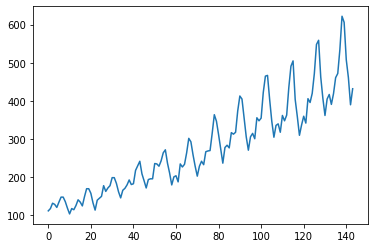

In [3]:
 plt.plot(dataset)

In [4]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset.min()

0.0

In [5]:
train_size = 100
test_size = 44

In [6]:
train = dataset[0:train_size,:]
train.shape

(100, 1)

In [7]:
test = dataset[train_size:144,:]
test.shape

(44, 1)

In [8]:
# build training and testing data

In [9]:
def get_data(dataset,look_back):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)    

In [10]:
look_back= 1
X_train,y_train = get_data(train,look_back)

In [11]:
X_train.shape

(98, 1)

In [12]:
X_train,y_train

(array([[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104],
        [0.07142857],
        [0.05984556],
        [0.04054054],
        [0.08687259],
        [0.12741313],
        [0.12741313],
        [0.1042471 ],
        [0.05598456],
        [0.01930502],
        [0.06949807],
        [0.07915058],
        [0.08880309],
        [0.14285714],
        [0.11389961],
        [0.13127413],
        [0.14285714],
        [0.18339768],
        [0.18339768],
        [0.15444015],
        [0.11196911],
        [0.08108108],
        [0.11969112],
        [0.12934363],
        [0.14671815],
        [0.17181467],
        [0.14864865],
        [0.15250965],
        [0.22007722],
        [0.24324324],
        [0.26640927],
        [0.2027027 ],
        [0

In [13]:
X_test,y_test = get_data(test,look_back)

In [14]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
X_train.shape

(98, 1, 1)

# Build the model

In [16]:
model = Sequential()
model.add(LSTM(5,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5)                 140       
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,epochs=50,batch_size=1)

Train on 98 samples
Epoch 1/50
98/98 [==============================] - 8s 77ms/sample - loss: 0.0392
Epoch 2/50
98/98 [==============================] - 0s 5ms/sample - loss: 0.0177
Epoch 3/50
98/98 [==============================] - 1s 6ms/sample - loss: 0.0148
Epoch 4/50
98/98 [==============================] - 0s 5ms/sample - loss: 0.0135
Epoch 5/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0123
Epoch 6/50
98/98 [==============================] - 0s 3ms/sample - loss: 0.0112
Epoch 7/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0098
Epoch 8/50
98/98 [==============================] - 1s 6ms/sample - loss: 0.0087
Epoch 9/50
98/98 [==============================] - 0s 5ms/sample - loss: 0.0074
Epoch 10/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0063
Epoch 11/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0052
Epoch 12/50
98/98 [==============================] - 0s 4ms/sample - loss: 0.0042
Epoc

In [19]:
y_pred = model.predict(X_test)

In [20]:
scaler.scale_

array([0.0019305])

In [21]:
y_pred

array([[0.47838956],
       [0.60082996],
       [0.6777102 ],
       [0.6812464 ],
       [0.5682117 ],
       [0.4636111 ],
       [0.38569528],
       [0.44325152],
       [0.4506598 ],
       [0.40985718],
       [0.49129853],
       [0.4654598 ],
       [0.49314082],
       [0.6242361 ],
       [0.7233809 ],
       [0.7476915 ],
       [0.5682117 ],
       [0.48576877],
       [0.39499164],
       [0.44510415],
       [0.48761246],
       [0.45436198],
       [0.5718473 ],
       [0.55364263],
       [0.59721744],
       [0.6900706 ],
       [0.8210286 ],
       [0.83944964],
       [0.67417014],
       [0.57366407],
       [0.49129853],
       [0.57002985],
       [0.59179294],
       [0.5445161 ],
       [0.59541   ],
       [0.6706265 ],
       [0.6900706 ],
       [0.7990763 ],
       [0.942101  ],
       [0.9165027 ],
       [0.75287414],
       [0.6706265 ]], dtype=float32)

In [22]:
y_pred = scaler.inverse_transform(y_pred)

In [23]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [24]:
# plot basline and predicyion

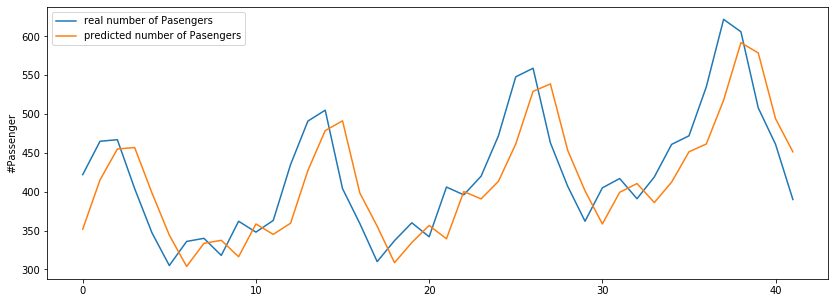

In [25]:
plt.figure(figsize=(14,5))
plt.plot(y_test,label='real number of Pasengers')
plt.plot(y_pred,label='predicted number of Pasengers')
plt.ylabel('#Passenger')
plt.legend()
plt.savefig('result.png')
plt.show()